<a href="https://colab.research.google.com/github/sitthatkaja/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [1]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [2]:
Name = 'สิทธัตกะ จรัสแสง'
ID = '6230205412'

In [3]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [4]:
Data = DataGenerator(Name,ID)

020:30:16


In [5]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-10.187117,5.645359,-1.512009,-8.408605,-7.160649,8.152055,-5.137610,-8.514089,-6.140884,10.495298,1.590252,3.370453,0.659568,5.630557,1.300547,2.487644,6.066393,8.233752,-9.202617,-5.345057,5.844010,1.529182,-3.323277,3.321481,2.621559,-4.425307,4.524257,-4.957104,6.386672,-10.452964,11.290718,-50.264820
1,8.802957,-9.680265,-5.146325,-1.400457,4.109127,9.107175,8.461001,1.703898,-0.734701,-0.662673,3.817067,1.822420,4.052866,-3.271882,7.773785,7.411452,-4.505587,2.963060,7.674272,-9.869400,-8.226315,8.427967,5.859954,2.930561,4.895293,-7.116522,-8.471998,5.241182,-1.075735,4.753808,-19.360529,25.769040
2,4.566708,10.088068,6.267673,-5.007461,-6.157636,-4.656535,9.834261,1.608311,6.068735,-10.170915,7.084125,-9.178798,-7.684204,-11.860847,-3.715293,-3.697722,9.908313,6.599582,0.364110,7.548956,-8.481781,5.089799,-7.056839,-5.440225,7.366136,-6.099482,5.900475,-0.567453,3.676044,3.636315,20.176137,20.181577
3,-1.557750,-5.619996,-0.729111,7.873232,-7.234014,-3.057497,-2.156534,-4.396004,-8.843602,-6.002348,6.974013,-6.001278,-8.506518,-2.456330,1.138076,-3.899233,9.395032,-6.214876,9.013846,1.558676,6.049342,2.618855,-7.194114,-10.214505,8.954457,7.642740,4.098489,-1.835569,-1.134072,7.054722,-11.239992,37.273609
4,9.105714,-10.918593,-6.447384,1.260397,6.235345,10.998694,9.431398,4.326759,-1.366271,0.720983,2.657494,5.502511,6.129621,-1.155109,9.711989,5.343099,-7.353672,2.485260,7.425995,-9.048266,-7.630582,7.810077,6.552491,3.859978,5.717528,-3.768863,-7.753635,5.075417,-1.536883,5.055226,-21.837186,27.276130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.012739,-5.982394,-2.377600,3.991366,2.066386,8.939499,3.515521,-0.687216,-7.096250,-0.483933,-3.487503,-6.412030,1.698171,5.591985,2.200870,1.710173,4.215186,7.796989,7.679128,5.763228,-5.406276,-5.459429,8.663905,-0.663315,-1.347786,1.658434,4.270892,5.375995,-0.445427,10.680069,-11.964788,55.400344
9996,1.971844,9.351393,5.487986,5.947889,-8.621342,5.833916,-0.831200,0.799592,2.719228,-3.751520,-4.101230,3.144996,3.296714,7.119346,3.873315,-10.067322,-7.486359,5.966499,-6.699479,-5.169989,7.498531,8.563825,0.733198,-6.472467,4.942586,-0.162590,2.895984,5.859200,1.094162,0.813355,18.702787,6.066777
9997,4.313977,7.818759,6.398568,-4.755216,-5.181228,-3.405445,11.223262,3.490421,6.006418,-9.669740,6.020925,-9.548196,-8.811076,-9.948476,-4.142153,-3.013274,8.687351,7.583746,1.857641,5.131343,-10.503256,2.915657,-8.064281,-3.891103,7.350757,-5.370867,5.108498,0.922176,3.686926,3.322278,15.637518,18.611389
9998,3.029997,-7.750469,9.031552,9.307987,-1.619870,1.449752,-2.457904,6.772582,-7.931218,8.501263,6.798074,1.240366,4.155902,6.037059,0.815239,-5.158712,-5.980060,5.424738,4.949754,-0.027357,9.037065,-4.983274,-2.470661,-4.061016,-3.000973,3.853341,-7.830560,2.054371,2.182887,-10.723758,-15.500938,-51.618788


ข้อมูลที่ได้มาเป็นโจทย์ที่ได้มาจาก Seed 020:30:16 ซึ่งมีข้อมูลจำนวน 10000 แถวและ 32 คอลัมน์ จากนั้นทำการเตรียมข้อมูลก่อนนำไปใช้ทำการตัดตัวที่มีค่าสมประสิทธิ์ความสัมพันธิ์ (Correlation) กันเองออกไป เพื่อลดข้อมูลที่เหมือนกันออกไป

ดูขนาดของข้อมูลที่กำหนดมาให้

In [6]:
Data.shape

(10000, 32)

จากนั้นดูขนาดของ Correlation coeficient จากข้อมูล

In [8]:
corr = np.corrcoef(Data.to_numpy().T)
corr.shape

(32, 32)

จากนั้นให้ทำการวนลูปหาค่าสัมประสิทธิ์ความสัมพันธ์ (Correlation) ที่ซ้ำกัดเพื่อขจัดข้อมูลนั้นออกไป

In [9]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

row = 1 column = 30 corrcoef = 1.0
row = 30 column = 1 corrcoef = 1.0


จากการวนลูปพบว่าค่าที่ 1 และค่า 30 มีค่าที่เท่ากันหรือซ้ำกัน ฉะนั้นจำเป็นที่จะต้องตัดข้อมูลออกก่อนจึงนำไปใช้ โดยการแสดงข้อมูลทั้งหมด

In [31]:
newdata = Data.iloc[:,1:30]
newdata

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,5.645359,-1.512009,-8.408605,-7.160649,8.152055,-5.137610,-8.514089,-6.140884,10.495298,1.590252,3.370453,0.659568,5.630557,1.300547,2.487644,6.066393,8.233752,-9.202617,-5.345057,5.844010,1.529182,-3.323277,3.321481,2.621559,-4.425307,4.524257,-4.957104,6.386672,-10.452964
1,-9.680265,-5.146325,-1.400457,4.109127,9.107175,8.461001,1.703898,-0.734701,-0.662673,3.817067,1.822420,4.052866,-3.271882,7.773785,7.411452,-4.505587,2.963060,7.674272,-9.869400,-8.226315,8.427967,5.859954,2.930561,4.895293,-7.116522,-8.471998,5.241182,-1.075735,4.753808
2,10.088068,6.267673,-5.007461,-6.157636,-4.656535,9.834261,1.608311,6.068735,-10.170915,7.084125,-9.178798,-7.684204,-11.860847,-3.715293,-3.697722,9.908313,6.599582,0.364110,7.548956,-8.481781,5.089799,-7.056839,-5.440225,7.366136,-6.099482,5.900475,-0.567453,3.676044,3.636315
3,-5.619996,-0.729111,7.873232,-7.234014,-3.057497,-2.156534,-4.396004,-8.843602,-6.002348,6.974013,-6.001278,-8.506518,-2.456330,1.138076,-3.899233,9.395032,-6.214876,9.013846,1.558676,6.049342,2.618855,-7.194114,-10.214505,8.954457,7.642740,4.098489,-1.835569,-1.134072,7.054722
4,-10.918593,-6.447384,1.260397,6.235345,10.998694,9.431398,4.326759,-1.366271,0.720983,2.657494,5.502511,6.129621,-1.155109,9.711989,5.343099,-7.353672,2.485260,7.425995,-9.048266,-7.630582,7.810077,6.552491,3.859978,5.717528,-3.768863,-7.753635,5.075417,-1.536883,5.055226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-5.982394,-2.377600,3.991366,2.066386,8.939499,3.515521,-0.687216,-7.096250,-0.483933,-3.487503,-6.412030,1.698171,5.591985,2.200870,1.710173,4.215186,7.796989,7.679128,5.763228,-5.406276,-5.459429,8.663905,-0.663315,-1.347786,1.658434,4.270892,5.375995,-0.445427,10.680069
9996,9.351393,5.487986,5.947889,-8.621342,5.833916,-0.831200,0.799592,2.719228,-3.751520,-4.101230,3.144996,3.296714,7.119346,3.873315,-10.067322,-7.486359,5.966499,-6.699479,-5.169989,7.498531,8.563825,0.733198,-6.472467,4.942586,-0.162590,2.895984,5.859200,1.094162,0.813355
9997,7.818759,6.398568,-4.755216,-5.181228,-3.405445,11.223262,3.490421,6.006418,-9.669740,6.020925,-9.548196,-8.811076,-9.948476,-4.142153,-3.013274,8.687351,7.583746,1.857641,5.131343,-10.503256,2.915657,-8.064281,-3.891103,7.350757,-5.370867,5.108498,0.922176,3.686926,3.322278
9998,-7.750469,9.031552,9.307987,-1.619870,1.449752,-2.457904,6.772582,-7.931218,8.501263,6.798074,1.240366,4.155902,6.037059,0.815239,-5.158712,-5.980060,5.424738,4.949754,-0.027357,9.037065,-4.983274,-2.470661,-4.061016,-3.000973,3.853341,-7.830560,2.054371,2.182887,-10.723758


ทำให้ได้ข้อมูลใหม่มาใช้งาน

***หมายเหตุ : ข้อมูลที่อาจารย์ให้มาในชื่อ columns เป็น type ที่ไม่สามารถทำการ drop ได้จึงจำเป็นที่จะต้องใช้ data.iloc ในการทำการตัด columns ออกไปและไม่สามารถนำข้อมูลที่ไม่จำเป็นต้องโดนตัดกลับมาให้ได้ เนื่องจากอาจารย์ยังไม่สอนเชื่อมตาราง***

จากโจทย์ข้อที่ 2 ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

โดยการเอา function k-means จาก sklearn.cluster มาใช้งาน

IMPORT

In [33]:
from sklearn.cluster import KMeans

จากนั้นกำหนดค่า k ที่ต้องการโดยให้ k = 4 และ random_state=2021 ให้เริ่มจุด ณ จุดๆนี้

DEFINE

In [36]:
kmeans = KMeans(n_clusters=4,random_state=2021)

คำนวณหาจุด center ของข้อมูลด้วยวิธี K-means clustering

FIT - TRANSFORM

In [37]:
kmeans.fit(newdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

จากนั้นแสดงจุด center ที่คำนวณออกมาได้

In [38]:
kmeans.cluster_centers_

array([[-2.25169051, -4.89342565,  8.22500518,  5.6474035 , -7.7542208 ,
         6.72404258,  2.62222931,  6.36851506,  0.34871386, -6.5801388 ,
        -1.00194371,  1.34351458, -4.99200667, -5.545567  , -2.38984966,
         0.25053063, -0.63789967,  3.2025595 , -7.60074537,  1.88854318,
        -6.49555079, -2.85070057, -4.1450389 ,  3.97182635, -1.10146817,
        -3.4103411 ,  0.03097696,  9.82198357,  2.76015378],
       [-0.19276483,  1.33459524,  2.97324318, -1.41618821, -0.20794756,
        -2.48288615, -0.1385968 , -1.66080902,  2.87699643,  0.9664987 ,
         3.6999511 ,  3.11692486,  5.040901  , -0.04772086,  1.68144648,
         1.90879495,  2.61418553, -4.47217637,  2.54545876,  1.15253901,
         0.63972973, -1.65605211, -0.04733315, -1.35440378, -3.86306258,
        -1.51265504,  1.02915776,  1.04457518, -5.73443711],
       [ 1.80481604,  3.18125334,  1.48273128, -6.51243506, -3.02505678,
         3.78792829, -0.50345888, -0.41759362, -7.69260905,  7.03636827,
  

จากนั้นทำการจัดกลุ่มของข้อมูล

In [40]:
y = kmeans.predict(newdata)
y

array([1, 3, 2, ..., 2, 1, 2], dtype=int32)

ทำการลด Dimension ให้เหลือ 2 และวาดกราฟ scatter plot จากการ Predict 

In [57]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
pca = PCA(n_components=2)
new_pca = pca.fit_transform(newdata)

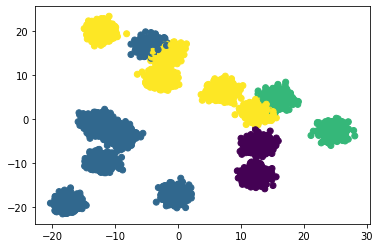

In [44]:
kmeans = KMeans(n_clusters=4, random_state=2021)
kmeans.fit(newdata)
y = kmeans.predict(newdata)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

จากนั้นทำการหาจำนวนกลุ่มที่เหมาะสมต่อการแบ่งกลุ่มโดยการหาค่า k ที่เหมาะสมของข้อมูลด้วยวิธี The Elbow Method

ทำการหาค่า SSE (Sum of Squared error) ของข้อมูล

In [46]:
kmeans.inertia_

6811674.586506553

In [49]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    kmeans.fit(newdata)
    SSE.append(kmeans.inertia_)
SSE

[9906508.553051103,
 8561111.758623503,
 7526889.77271021,
 6811674.586506553,
 6062753.46985673,
 5334444.667888967,
 4621335.446433915,
 3945198.1037585414]

จากนำ


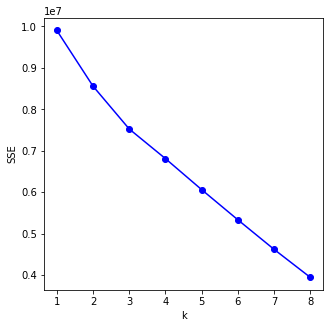

In [59]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')

plt.xlabel('k')
plt.ylabel('SSE');